#Exploring Personal Perception Influence on Match

In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

In [140]:
url = 'https://raw.githubusercontent.com/samoseley/ecs171projectspeeddating/main/Speed%20Dating%20Data.csv'
df = pd.read_csv(url, encoding='latin1')

In [141]:
np.random.seed(30536)

##Preprocessing

###Copying Important Features
Here we are looking at a persons age and their decision as well as how much their interests overlap with their partner according to the survey results, how much they think their interests overlap with theur partner, and how much importance they place on interests overlapping in a partner.

In [142]:
df = df[['gender', 'dec', 'int_corr', 'shar', 'shar1_2']].copy()
df.rename(columns={'shar': 'percieved_Int_Corr', 'shar1_2': 'Importance_Int_Corr'}, inplace=True)
display(df)

,gender,dec,int_corr,percieved_Int_Corr,Importance_Int_Corr
0,0,1,0.14,5.0,16.67
1,0,1,0.54,6.0,16.67
2,0,1,0.16,7.0,16.67
3,0,1,0.61,8.0,16.67
4,0,1,0.21,6.0,16.67
...,...,...,...,...,...
8373,1,0,0.64,NaN,5.00
8374,1,0,0.71,NaN,5.00
8375,1,0,-0.46,NaN,5.00
8376,1,0,0.62,5.0,5.00


###Remove NaN/Empty Values
Since we have enough data we can afford to drop NaN observations and still have a robust dataset.

In [143]:
print(df.isnull().sum())


#remove NaN observations
df = df.dropna()
display(df)

gender                    0
dec                       0
int_corr                158
percieved_Int_Corr     1067
Importance_Int_Corr     915
dtype: int64


,gender,dec,int_corr,percieved_Int_Corr,Importance_Int_Corr
0,0,1,0.14,5.0,16.67
1,0,1,0.54,6.0,16.67
2,0,1,0.16,7.0,16.67
3,0,1,0.61,8.0,16.67
4,0,1,0.21,6.0,16.67
...,...,...,...,...,...
8368,1,0,0.27,4.0,5.00
8369,1,0,0.45,6.0,5.00
8370,1,0,0.35,8.0,5.00
8376,1,0,0.62,5.0,5.00


###Normalize Data
This so comparisons between features can be made more easily

In [144]:
scaler = MinMaxScaler()
df_colnames = ['gender', 'dec', 'int_corr', 'percieved_Int_Corr', 'Importance_Int_Corr']
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df_colnames)
display(df_norm)

,gender,dec,int_corr,percieved_Int_Corr,Importance_Int_Corr
0,0.0,1.0,0.557471,0.5,0.476286
1,0.0,1.0,0.787356,0.6,0.476286
2,0.0,1.0,0.568966,0.7,0.476286
3,0.0,1.0,0.827586,0.8,0.476286
4,0.0,1.0,0.597701,0.6,0.476286
...,...,...,...,...,...
6417,1.0,0.0,0.632184,0.4,0.142857
6418,1.0,0.0,0.735632,0.6,0.142857
6419,1.0,0.0,0.678161,0.8,0.142857
6420,1.0,0.0,0.833333,0.5,0.142857


###Means & Correlations

In [145]:
df_norm.describe().round(2)


,gender,dec,int_corr,percieved_Int_Corr,Importance_Int_Corr
count,6422.00,6422.00,6422.00,6422.00,6422.00
mean,0.51,0.44,0.59,0.55,0.37
std,0.50,0.50,0.17,0.22,0.19
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.47,0.40,0.29
50%,1.00,0.00,0.60,0.60,0.37
75%,1.00,1.00,0.72,0.70,0.49
max,1.00,1.00,1.00,1.00,1.00


###Standardize Data

In [146]:
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df_norm), columns=df_colnames)
# Keep dec and gender data categorical not continuous to avoid logistic regression errors
df_std['dec'] = df_norm['dec']
df_std['gender'] = df_norm['gender']
display(df_std)

,gender,dec,int_corr,percieved_Int_Corr,Importance_Int_Corr
0,0.0,1.0,-0.189511,-0.235352,0.565036
1,0.0,1.0,1.126597,0.228491,0.565036
2,0.0,1.0,-0.123705,0.692334,0.565036
3,0.0,1.0,1.356915,1.156177,0.565036
4,0.0,1.0,0.040808,0.228491,0.565036
...,...,...,...,...,...
6417,1.0,0.0,0.238224,-0.699195,-1.189163
6418,1.0,0.0,0.830472,0.228491,-1.189163
6419,1.0,0.0,0.501446,1.156177,-1.189163
6420,1.0,0.0,1.389818,-0.235352,-1.189163


In [147]:
df_std.describe().round(2)
## Note that all means except for mean on dec are now zero, and all standard deviations are one, because of standardization

,gender,dec,int_corr,percieved_Int_Corr,Importance_Int_Corr
count,6422.00,6422.00,6422.00,6422.00,6422.00
mean,0.51,0.44,0.00,-0.00,0.00
std,0.50,0.50,1.00,1.00,1.00
min,0.00,0.00,-3.38,-2.55,-1.94
25%,0.00,0.00,-0.72,-0.70,-0.44
50%,1.00,0.00,0.04,0.23,0.02
75%,1.00,1.00,0.76,0.69,0.61
max,1.00,1.00,2.34,2.08,3.32


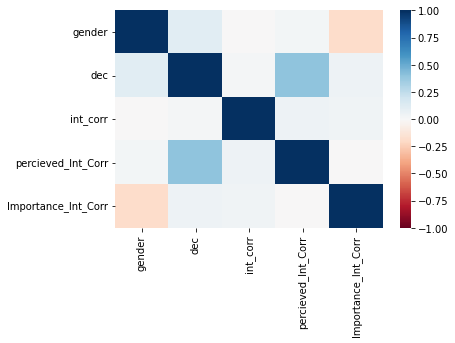

In [148]:
corr = df.corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=False, cmap='RdBu')

##Regression Analysis: Logistic Regression
Since our target is a yes/no variable (dec)

###Run Model & Test it


####Create Model & Look at Error
As testing and training error are fairly close together, there is no evidence to suggest overfitting has occured

In [149]:
X_train, X_test, y_train, y_test = train_test_split(df_std.drop(columns=['dec']), df_std['dec'], test_size=.25)
model = LogisticRegression()
model.fit(X_train, y_train)


#get Testing and Training error

print("Logistic Regression MSE Trial 1:")
yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)

#mse for training data
mse = mean_squared_error(y_train, yhat_train)
print('Training MSE: %8.15f' % mse)

#mse for testing data
mse = mean_squared_error(y_test, yhat_test)
print('Testing MSE: %8.15f' % mse)


Logistic Regression MSE Trial 1:
Training MSE: 0.305232558139535
Testing MSE: 0.310087173100872


####Classification Report
We have 69% accuracy which is fine considering the relatively low number of columns being analyzed. Our precisions and recall for both answers is in the same range as the accuracy meaning that our model does not heavily favor one answer over another.

In [150]:
print("Testing Precision & Recall")
test_classif = classification_report(y_test, yhat_test)
print(test_classif)

Testing Precision & Recall
              precision    recall  f1-score   support

         0.0       0.71      0.75      0.73       895
         1.0       0.66      0.61      0.64       711

    accuracy                           0.69      1606
   macro avg       0.69      0.68      0.68      1606
weighted avg       0.69      0.69      0.69      1606



###Coefficient Analysis
The percieved shared interests with one's partner seems to have a massive impact on our models decision to the point that the other variables are basically ignored. Interestingly, the interest correlation according to the surveys both parties took has virtually no impact on our model.

['gender', 'dec', 'int_corr', 'percieved_Int_Corr', 'Importance_Int_Corr']
[[0.614923   0.01658341 0.99145774 0.18903383]]


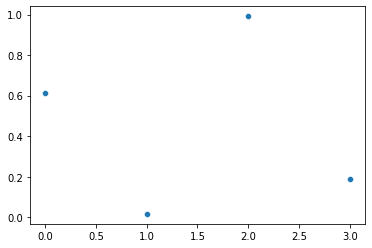

In [151]:
print(df_colnames)
print(model.coef_)
sns.scatterplot(x=list(range(0,len(model.coef_[0]))),y=model.coef_[0])

####Create Models Seperated by Gender


In [152]:
dfWomen = df_std.loc[df_std['gender'] == 0]
dfWomen = dfWomen.drop(columns=['gender'])
dfMen = df_std.loc[df_std['gender'] == 1]
dfMen = dfMen.drop(columns=['gender'])


#### Looking at just men

Logistic Regression MSE Trial 1:
Training MSE: 0.309320309320309
Testing MSE: 0.321951219512195
Testing Precision & Recall
              precision    recall  f1-score   support

         0.0       0.68      0.66      0.67       408
         1.0       0.68      0.69      0.68       412

    accuracy                           0.68       820
   macro avg       0.68      0.68      0.68       820
weighted avg       0.68      0.68      0.68       820

['gender', 'dec', 'int_corr', 'percieved_Int_Corr', 'Importance_Int_Corr']
[[-0.00171337  0.95497666  0.32495354]]


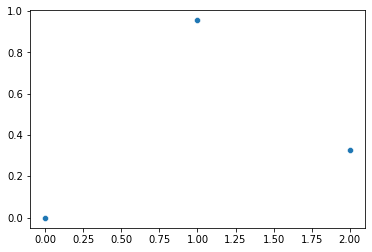

In [153]:
X_train_men, X_test_men, y_train_men, y_test_men = train_test_split(dfMen.drop(columns=['dec']), dfMen['dec'], test_size=.25)
modelMen = LogisticRegression()
modelMen.fit(X_train_men, y_train_men)


#get Testing and Training error

print("Logistic Regression MSE Trial 1:")
yhat_train_men = modelMen.predict(X_train_men)
yhat_test_men = modelMen.predict(X_test_men)

#mse for training data
mse = mean_squared_error(y_train_men, yhat_train_men)
print('Training MSE: %8.15f' % mse)

#mse for testing data
mse = mean_squared_error(y_test_men, yhat_test_men)
print('Testing MSE: %8.15f' % mse)

print("Testing Precision & Recall")
test_classif = classification_report(y_test_men, yhat_test_men)
print(test_classif)

print(df_colnames)
print(modelMen.coef_)
sns.scatterplot(x=list(range(0,len(modelMen.coef_[0]))),y=modelMen.coef_[0])

#### Looking at just women

Logistic Regression MSE Trial 1:
Training MSE: 0.305343511450382
Testing MSE: 0.271918678526048
Testing Precision & Recall
              precision    recall  f1-score   support

         0.0       0.76      0.82      0.79       487
         1.0       0.66      0.58      0.62       300

    accuracy                           0.73       787
   macro avg       0.71      0.70      0.70       787
weighted avg       0.72      0.73      0.72       787

['gender', 'dec', 'int_corr', 'percieved_Int_Corr', 'Importance_Int_Corr']
[[-0.0426298   0.96999403  0.10297838]]


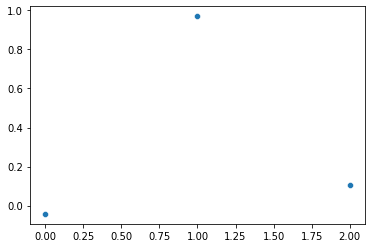

In [154]:
X_train_women, X_test_women, y_train_women, y_test_women = train_test_split(dfWomen.drop(columns=['dec']), dfWomen['dec'], test_size=.25)
modelWomen = LogisticRegression()
modelWomen.fit(X_train_women, y_train_women)


#get Testing and Training error

print("Logistic Regression MSE Trial 1:")
yhat_train_women = modelWomen.predict(X_train_women)
yhat_test_women = modelWomen.predict(X_test_women)

#mse for training data
mse = mean_squared_error(y_train_women, yhat_train_women)
print('Training MSE: %8.15f' % mse)

#mse for testing data
mse = mean_squared_error(y_test_women, yhat_test_women)
print('Testing MSE: %8.15f' % mse)

print("Testing Precision & Recall")
test_classif = classification_report(y_test_women, yhat_test_women)
print(test_classif)

print(df_colnames)
print(modelWomen.coef_)
sns.scatterplot(x=list(range(0,len(modelWomen.coef_[0]))),y=modelWomen.coef_[0])

##Conclusion
The percieved shared interests with one's partner seems to have a massive impact on their decision as we were able to achieve a respectable level of accuracy with our model almost exclusively looking at percieved_Int_Corr. By looking at our models split by gender we can see that there is very little difference between the two. Both have almost identical coefficients as the original model and both have very similar accuracy as well. The model looking at women had slightly higher accuracy but by looking at the precision and recall of both models we can assume that is because men's decision was yes about 50% of the time while women's decision was no more often than it was yes.